In [2]:
from refinement import Refinement_Hook
import torch
import numpy as np
%load_ext autoreload
%autoreload 2

In [43]:
lin = torch.nn.Linear(10, 1, bias = False)
lin_2 = torch.nn.Linear(1,1, bias = False)
lin.weight = torch.nn.parameter.Parameter(torch.ones(10))
lin_2.weight = torch.nn.parameter.Parameter(torch.tensor([5.0]))
ref_hook = Refine_Hook(scaling = 2)

In [44]:
lin_2(lin(torch.ones((1,10))))

tensor(50., grad_fn=<DotBackward0>)

In [45]:
ref_hook.register(lin)
lin_2(lin(torch.ones((1,10))))

tensor(100., grad_fn=<DotBackward0>)

In [51]:
ref_hook.scaling = 2
lin_2(lin(torch.ones((1,10))))


tensor(100., grad_fn=<DotBackward0>)

In [28]:
from eval import Poisoned_MNIST_Train, make_spurious_mnist
import torchvision
import os

In [29]:
data = Poisoned_MNIST_Train(os.path.join("D:", "MNIST"), {0 : lambda x : x}, {0:0.5})

In [30]:
data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [36]:
data.get_clean_subset(100)

Dataset MNIST
    Number of datapoints: 1000
    Root location: D:MNIST
    Split: Train
    StandardTransform
Transform: Compose(
               <class 'torchvision.transforms.transforms.ToTensor'>
           )

In [69]:
def corrupt_ones(x):
    x[:20,:20] = 1
    return x
train, val = make_spurious_mnist(os.path.join("D:", "MNIST"), {0 : lambda x : -x, 1 : corrupt_ones}, {0:1.0, 1:1.0})

In [56]:
train.get_clean_subset(100)

ValueError: a must be greater than 0 unless no samples are taken

In [72]:
torch.argwhere(train.dataset.targets == 1)


tensor([[    3],
        [    6],
        [    8],
        ...,
        [59979],
        [59984],
        [59994]])

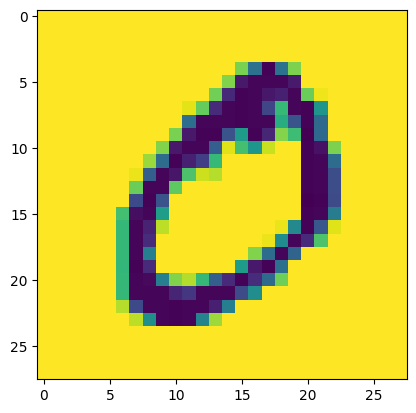

In [74]:
from matplotlib import pyplot as plt
plt.imshow(train[1][0].detach()[0])